<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Data

In [1]:
# Don't forget to import data!
import pandas as pd
df = pd.read_csv("HW3_movie_metadata.csv")

In [2]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isna())

       director_name  ...  movie_facebook_likes
0      James Cameron  ...                 33000
1     Gore Verbinski  ...                     0
2         Sam Mendes  ...                 85000
3  Christopher Nolan  ...                164000
4        Doug Walker  ...                     0

[5 rows x 27 columns]
         director_name  ...  movie_facebook_likes
5038       Scott Smith  ...                    84
5039               NaN  ...                 32000
5040  Benjamin Roberds  ...                    16
5041       Daniel Hsia  ...                   660
5042          Jon Gunn  ...                   456

[5 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   502

# Preprocess Data

In [3]:
df2 = df.copy()
df2 = df2.dropna(subset = ['imdb_score'])
df2 = df2._get_numeric_data()
df2 = df2.fillna(df2.median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     5043 non-null   float64
 1   duration                   5043 non-null   float64
 2   director_facebook_likes    5043 non-null   float64
 3   actor_3_facebook_likes     5043 non-null   float64
 4   actor_1_facebook_likes     5043 non-null   float64
 5   gross                      5043 non-null   float64
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   facenumber_in_poster       5043 non-null   float64
 9   num_user_for_reviews       5043 non-null   float64
 10  budget                     5043 non-null   float64
 11  title_year                 5043 non-null   float64
 12  actor_2_facebook_likes     5043 non-null   float64
 13  imdb_score                 5043 non-null   float

In [31]:
lo_bound = df2['imdb_score'].quantile(0.4)
hi_bound = df2['imdb_score'].quantile(0.6)

lo_data = df2[df2['imdb_score'] <= lo_bound]
lo_data['imdb_score'].loc[:] = 0 #LOW

hi_data = df2[df2['imdb_score'] >= hi_bound]
hi_data['imdb_score'].loc[:] = 1 #HIGH

df2['rating'] = pd.concat([lo_data, hi_data], axis=0)['imdb_score']
df2['rating'].value_counts()
df2 = df2.dropna(subset = ['rating'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839aaeacd0>,
      dtype=object)

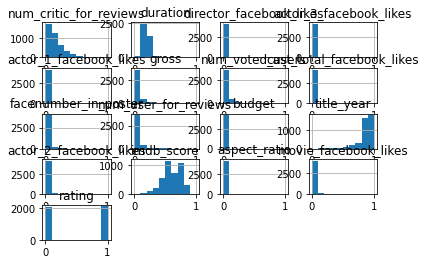

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df3.hist()

In [37]:
X = df3.drop(columns=['imdb_score', 'rating'])
y = df3['rating']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4248 non-null   float64
 1   duration                   4248 non-null   float64
 2   director_facebook_likes    4248 non-null   float64
 3   actor_3_facebook_likes     4248 non-null   float64
 4   actor_1_facebook_likes     4248 non-null   float64
 5   gross                      4248 non-null   float64
 6   num_voted_users            4248 non-null   float64
 7   cast_total_facebook_likes  4248 non-null   float64
 8   facenumber_in_poster       4248 non-null   float64
 9   num_user_for_reviews       4248 non-null   float64
 10  budget                     4248 non-null   float64
 11  title_year                 4248 non-null   float64
 12  actor_2_facebook_likes     4248 non-null   float64
 13  aspect_ratio               4248 non-null   float

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=1)

In [39]:
train=X_train.copy()
train['target']=y_train
train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,target
460,0.286946,0.204365,0.024182,0.020043,0.004687,0.062401,0.059997,0.007898,0.023256,0.056928,0.005730,0.91,0.004657,0.078947,0.000000,1.0
3286,0.172414,0.208333,0.004773,0.032522,0.028125,0.000417,0.013806,0.038477,0.000000,0.016999,0.001310,0.97,0.043796,0.078947,0.000000,0.0
346,0.182266,0.253968,0.001636,0.004609,0.001397,0.040908,0.045583,0.002191,0.000000,0.091915,0.004912,0.87,0.002518,0.078947,0.000000,0.0
1859,0.098522,0.186508,0.000591,0.021696,0.001017,0.020261,0.008369,0.004108,0.069767,0.017988,0.001637,0.87,0.004051,0.045209,0.001149,0.0
582,0.098522,0.168651,0.001864,0.022696,0.001563,0.136947,0.029283,0.006167,0.023256,0.022732,0.004912,0.87,0.006971,0.045209,0.002539,0.0


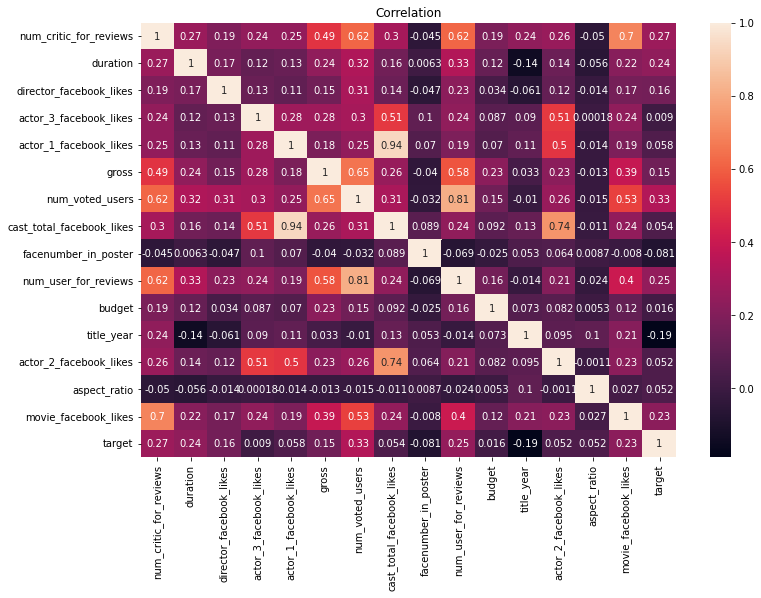

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)
plt.title("Correlation")
plt.show()

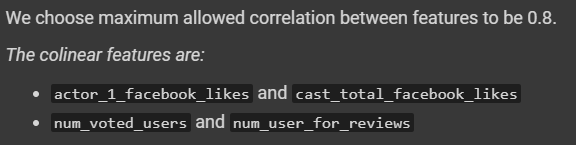

In [28]:
X_train = X_train.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])
X_test = X_test.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])

# Modeling Data (KNN)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_val = [{'n_neighbors' : range(3,10), 'metric' : ['euclidean', 'minkowski', 'canberra']}]
clfr = GridSearchCV(KNeighborsClassifier(), param_val, cv = 5, scoring='roc_auc_ovr')
clfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc_ovr')

In [53]:
print(clfr.best_score_)
print(clfr.best_params_)

0.8239890233661843
{'metric': 'euclidean', 'n_neighbors': 9}


In [54]:
from sklearn import metrics
y_pred_new = clfr.predict(X_test)
pred_prob_new=pd.DataFrame(clfr.predict_proba(X_test))
metrics.accuracy_score(y_test,y_pred_new)

0.7458823529411764

Euclidean metric with K = 9 yeilds satisfying accuracy.

In [69]:
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

         LOW       0.71      0.83      0.76       626
        HIGH       0.80      0.67      0.73       649

    accuracy                           0.75      1275
   macro avg       0.75      0.75      0.74      1275
weighted avg       0.75      0.75      0.74      1275
 

Accuracy on train:
 0.807
Accuracy on test:
 0.746


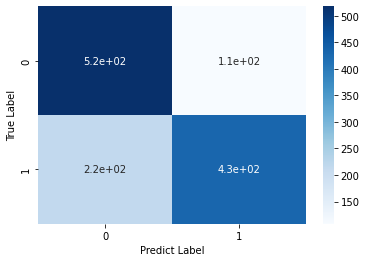

In [71]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=['LOW', 'HIGH']),'\n')
print("Accuracy on train:\n",metrics.accuracy_score(y_train,y_train_pred).round(3))
print("Accuracy on test:\n",metrics.accuracy_score(y_test,y_pred).round(3))
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()